In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from scipy import stats
from sklearn.decomposition import PCA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_eurchf = pd.read_csv('/content/EUR-CHF Exchange Rate.csv')
df_trends = pd.read_excel('/content/World_GT_Full.xlsx')

In [3]:
df_trends['Date'] = pd.to_datetime(df_trends.iloc[:, 0], infer_datetime_format=True)
df_eurchf['Date'] = pd.to_datetime(df_eurchf.iloc[:, 0], infer_datetime_format=True)

In [4]:
df_trends.iloc[:,1:] = df_trends.iloc[:,1:].diff()
df_trends

,Date,swiss franc,Europe,EUR,Switzerland,CHF,NASDAQ,S&P500,VIX,volatility,Germany,UK,sterling pound,GBP,Greece,Italy,Spain,France,DAX,unemployment,recession,euro,crisis,fed,finance,financial crisis,federal reserve,gold,inflation,treasuries,OPEC,contagion,corruption,disaster,futures,forwards,president,parliament,aid,EU,...,steel,silver,bronze,corn,commodities,natural gas,agriculture,emerging market,trade,interest rate,GDP,exports,imports,jobs,tax,tariff,uncertainty,gini,inequality,insurance,pension,liquidity,diversification,alpha,currency,CAPM,fixed income,commission,SEC,yield,real estate,eurodollar,regulations,deficit,yield curve,LIBOR,2008,bubble,energy,1939
0,2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-01-02,0.0,16.0,9.0,2.0,-1.0,10.0,-27.0,17.0,31.0,1.0,-2.0,0.0,1.0,-4.0,-1.0,-2.0,-6.0,2.0,2.0,0.0,-1.0,-6.0,7.0,20.0,0.0,0.0,1.0,19.0,0.0,8.0,0.0,-58.0,-1.0,3.0,-24.0,0.0,-3.0,10.0,0.0,...,-2.0,-13.0,-34.0,-13.0,18.0,19.0,6.0,0.0,-5.0,14.0,-5.0,25.0,11.0,2.0,5.0,34.0,15.0,-11.0,0.0,24.0,-13.0,0.0,-8.0,6.0,6.0,0.0,0.0,5.0,-3.0,35.0,10.0,0.0,-4.0,8.0,0.0,8.0,0.0,-16.0,6.0,10.0
2,2004-01-03,0.0,0.0,-10.0,-3.0,0.0,-6.0,0.0,-19.0,-31.0,-1.0,-3.0,0.0,-1.0,-1.0,0.0,-3.0,4.0,-2.0,0.0,0.0,0.0,5.0,-4.0,-16.0,0.0,10.0,-1.0,-6.0,0.0,-6.0,0.0,2.0,10.0,-7.0,30.0,0.0,0.0,-6.0,0.0,...,6.0,8.0,4.0,-1.0,-21.0,2.0,1.0,0.0,-4.0,-16.0,25.0,12.0,-21.0,-1.0,-6.0,-17.0,-3.0,0.0,0.0,-16.0,2.0,0.0,-8.0,-2.0,0.0,0.0,17.0,-5.0,8.0,-25.0,-2.0,0.0,8.0,7.0,0.0,-14.0,0.0,13.0,7.0,32.0
3,2004-01-04,19.0,-12.0,2.0,7.0,1.0,3.0,22.0,12.0,0.0,1.0,0.0,26.0,1.0,2.0,0.0,11.0,-5.0,1.0,1.0,2.0,0.0,0.0,-3.0,-3.0,0.0,-19.0,1.0,-8.0,0.0,2.0,0.0,7.0,-5.0,5.0,-38.0,0.0,0.0,-1.0,1.0,...,-5.0,-6.0,13.0,2.0,8.0,-16.0,3.0,14.0,5.0,7.0,3.0,-36.0,-25.0,2.0,1.0,23.0,8.0,5.0,10.0,-6.0,8.0,27.0,0.0,-5.0,7.0,0.0,-17.0,4.0,-2.0,1.0,5.0,0.0,-14.0,-9.0,0.0,7.0,0.0,18.0,5.0,-39.0
4,2004-01-05,-19.0,-7.0,-4.0,-8.0,-3.0,-5.0,-22.0,18.0,0.0,-3.0,-50.0,-26.0,-1.0,-2.0,1.0,-14.0,-16.0,-2.0,0.0,-2.0,-2.0,9.0,1.0,13.0,0.0,-3.0,9.0,2.0,0.0,-4.0,0.0,-15.0,5.0,-7.0,0.0,2.0,-1.0,-6.0,-2.0,...,-4.0,4.0,2.0,-6.0,1.0,17.0,25.0,-14.0,1.0,28.0,51.0,5.0,-16.0,4.0,5.0,-17.0,-20.0,9.0,49.0,4.0,-37.0,-27.0,0.0,11.0,11.0,0.0,0.0,9.0,35.0,13.0,11.0,0.0,7.0,38.0,0.0,-16.0,0.0,-38.0,-3.0,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6465,2021-09-13,-1.0,0.0,4.0,0.0,6.0,32.0,17.0,8.0,3.0,1.0,-2.0,1.0,1.0,-1.0,0.0,0.0,1.0,13.0,2.0,0.0,1.0,2.0,7.0,35.0,0.0,4.0,-1.0,7.0,2.0,-1.0,-1.0,3.0,2.0,10.0,0.0,0.0,3.0,5.0,0.0,...,5.0,0.0,-1.0,-6.0,21.0,12.0,2.0,0.0,-7.0,3.0,5.0,9.0,1.0,2.0,8.0,8.0,2.0,2.0,5.0,15.0,17.0,2.0,-1.0,2.0,2.0,2.0,1.0,2.0,-1.0,10.0,1.0,0.0,6.0,1.0,0.0,2.0,0.0,-8.0,22.0,-2.0
6466,2021-09-14,1.0,0.0,0.0,0.0,-1.0,2.0,0.0,-2.0,-1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-4.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,6.0,1.0,1.0,0.0,2.0,2.0,-1.0,0.0,-1.0,-1.0,0.0,0.0,...,-1.0,-1.0,1.0,0.0,30.0,5.0,1.0,2.0,-3.0,2.0,-1.0,-7.0,1.0,0.0,3.0,-1.0,-1.0,0.0,0.0,1.0,-2.0,1.0,1.0,-1.0,2.0,2.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,-1.0
6467,2021-09-15,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,-7.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,1.0,-1.0,0.0,-12.0,0.0,0.0,-1.0,1.0,-1.0,4.0,11.0,-1.0,0.0,0.0,7.0,4.0,1.0,1.0,3.0,-2.0,0.0,-1.0,2.0,7.0,1.0,2.0,0.0,0.0,-4.0,0.0,0.0,0.0,-7.0,-1.0,0.0,0.0,0.0,2.0,3.0
6468,2021-09-16,0.0,0.0,0.0,-1.0,-2.0,-5.0,-4.0,-1.0,-1.0,-

In [5]:
ts_df = df_eurchf.merge(df_trends, how = 'inner', on = ['Date'])

In [9]:
ts_df = ts_df.set_index(ts_df.iloc[:,0])
ts_df = ts_df.drop(['Date', ' value'], axis = 1)
ts_df = ts_df.iloc[1:,:]
ts_df['log_difference'] = -1*ts_df['log_difference']
ts_df

,log_difference,swiss franc,Europe,EUR,Switzerland,CHF,NASDAQ,S&P500,VIX,volatility,Germany,UK,sterling pound,GBP,Greece,Italy,Spain,France,DAX,unemployment,recession,euro,crisis,fed,finance,financial crisis,federal reserve,gold,inflation,treasuries,OPEC,contagion,corruption,disaster,futures,forwards,president,parliament,aid,EU,...,steel,silver,bronze,corn,commodities,natural gas,agriculture,emerging market,trade,interest rate,GDP,exports,imports,jobs,tax,tariff,uncertainty,gini,inequality,insurance,pension,liquidity,diversification,alpha,currency,CAPM,fixed income,commission,SEC,yield,real estate,eurodollar,regulations,deficit,yield curve,LIBOR,2008,bubble,energy,1939
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-05,-0.002498,-19.0,-7.0,-4.0,-8.0,-3.0,-5.0,-22.0,18.0,0.0,-3.0,-50.0,-26.0,-1.0,-2.0,1.0,-14.0,-16.0,-2.0,0.0,-2.0,-2.0,9.0,1.0,13.0,0.0,-3.0,9.0,2.0,0.0,-4.0,0.0,-15.0,5.0,-7.0,0.0,2.0,-1.0,-6.0,-2.0,...,-4.0,4.0,2.0,-6.0,1.0,17.0,25.0,-14.0,1.0,28.0,51.0,5.0,-16.0,4.0,5.0,-17.0,-20.0,9.0,49.0,4.0,-37.0,-27.0,0.0,11.0,11.0,0.0,0.0,9.0,35.0,13.0,11.0,0.0,7.0,38.0,0.0,-16.0,0.0,-38.0,-3.0,-6.0
2004-01-06,-0.002875,0.0,34.0,5.0,2.0,2.0,21.0,0.0,-20.0,30.0,5.0,77.0,0.0,0.0,9.0,0.0,7.0,25.0,2.0,3.0,0.0,3.0,-6.0,8.0,46.0,0.0,27.0,-8.0,44.0,0.0,3.0,0.0,41.0,-7.0,16.0,0.0,0.0,8.0,10.0,3.0,...,14.0,-5.0,4.0,16.0,11.0,-11.0,-14.0,12.0,20.0,-18.0,-69.0,22.0,13.0,-2.0,2.0,36.0,10.0,-9.0,-42.0,50.0,48.0,15.0,11.0,2.0,8.0,22.0,39.0,5.0,2.0,1.0,-28.0,15.0,46.0,-4.0,74.0,75.0,0.0,6.0,32.0,30.0
2004-01-07,0.000064,0.0,-13.0,-3.0,1.0,2.0,-3.0,0.0,-10.0,2.0,-2.0,-21.0,0.0,0.0,-1.0,1.0,7.0,-9.0,-1.0,-2.0,1.0,0.0,6.0,14.0,-16.0,0.0,1.0,1.0,-23.0,0.0,3.0,0.0,-32.0,3.0,-10.0,8.0,0.0,-4.0,-2.0,-1.0,...,-2.0,2.0,-10.0,-9.0,-7.0,29.0,18.0,-3.0,2.0,-2.0,18.0,-2.0,9.0,0.0,2.0,-25.0,17.0,-1.0,2.0,-24.0,-33.0,14.0,-11.0,-9.0,1.0,-12.0,19.0,-2.0,-24.0,-8.0,6.0,-4.0,-22.0,-10.0,-34.0,-50.0,0.0,2.0,3.0,-25.0
2004-01-08,0.001341,0.0,7.0,5.0,1.0,-2.0,16.0,0.0,6.0,-21.0,-1.0,3.0,8.0,0.0,-5.0,0.0,3.0,4.0,3.0,-3.0,0.0,-1.0,-7.0,-8.0,-8.0,2.0,-5.0,-2.0,0.0,0.0,-2.0,0.0,-5.0,0.0,12.0,15.0,0.0,2.0,3.0,1.0,...,2.0,-4.0,5.0,3.0,5.0,-8.0,-11.0,-9.0,8.0,6.0,-8.0,9.0,18.0,-2.0,-3.0,16.0,3.0,2.0,25.0,5.0,18.0,-11.0,0.0,-5.0,-1.0,-10.0,-20.0,-3.0,-13.0,5.0,-5.0,-11.0,21.0,18.0,-40.0,26.0,0.0,-1.0,-7.0,-3.0
2004-01-09,-0.000958,0.0,8.0,-1.0,1.0,0.0,-17.0,0.0,-4.0,0.0,1.0,-6.0,-8.0,0.0,-1.0,-1.0,-7.0,-1.0,-1.0,1.0,0.0,1.0,-3.0,4.0,7.0,2.0,22.0,-1.0,-10.0,50.0,3.0,1.0,3.0,1.0,-1.0,-8.0,2.0,-2.0,-3.0,-1.0,...,-1.0,3.0,39.0,0.0,-9.0,-13.0,10.0,0.0,-15.0,10.0,25.0,-4.0,-3.0,-2.0,0.0,-8.0,-30.0,1.0,-24.0,-10.0,1.0,-6.0,9.0,0.0,-14.0,0.0,-28.0,-2.0,19.0,-12.0,7.0,0.0,-3.0,-13.0,0.0,-24.0,0.0,-4.0,-13.0,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-09,0.005245,-1.0,-3.0,0.0,-2.0,-1.0,0.0,8.0,-2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,-1.0,-3.0,3.0,-3.0,0.0,0.0,1.0,2.0,-4.0,2.0,0.0,-2.0,-4.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,...,-3.0,-1.0,3.0,-1.0,-13.0,-4.0,2.0,1.0,1.0,-1.0,0.0,3.0,2.0,0.0,-1.0,0.0,-4.0,-1.0,1.0,-2.0,-7.0,-3.0,0.0,-1.0,0.0,5.0,-1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,17.0,1.0,-1.0,0.0,1.0,-4.0,-1.0
2021-09-10,-0.000369,0.0,-3.0,-1.0,-1.0,-1.0,-4.0,-4.0,-6.0,-2.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,0.0,-1.0,-4.0,-2.0,-1.0,0.0,-2.0,-1.0,-6.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,-1.0,-3.0,-1.0,0.0,0.0,-2.0,0.0,...,-2.0,0.0,0.0,1.0,7.0,-4.0,-3.0,1.0,2.0,-2.0,0.0,-2.0,-2.0,-1.0,-2.0,-3.0,1.0,-1.0,-2.0,-3.0,-4.0,-1.0,0.0,-2.0,-2.0,-3.0,0.0,-1.0,-3.0,-4.0,-1.0,-1.0,-4.0,-10.0,-2.0,0.0,0.0,2.0,-6.0,-1.0
2021-09-11,-0.000369,1.0,-3.0,-3.0,0.0,-3.0,-29.0,-5.0,-3.0,-2.0,-1.0,0.0,1.0,-1.0,0.0,0.0,-1.0,0.0,-11.0,-5.0,0.0,-1.0,-2.0,-6.0,-22.0,1.0,

#PCA Analysis

In [32]:
X = ts_df.iloc[:,1:]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


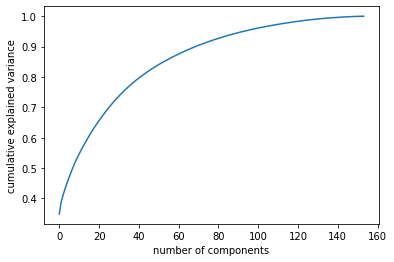

In [33]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Text(0.5, 1.0, 'Reconstructed image after PCA')

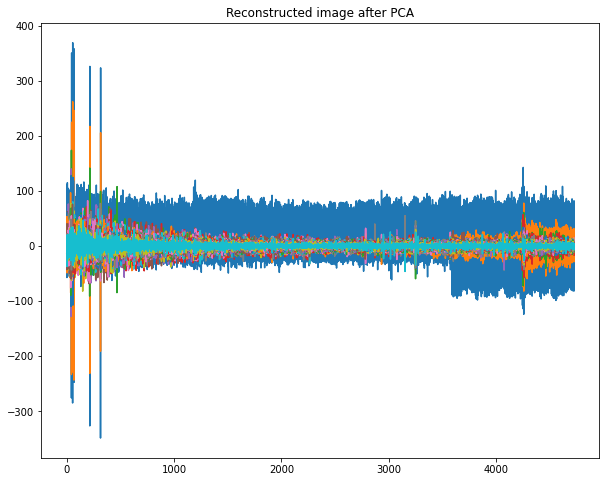

In [34]:
pca = PCA(n_components=40)
components = pca.fit_transform(X)

plt.figure(figsize=(10,8))
plt.plot(components)
plt.title("Reconstructed image after PCA")

In [35]:
comp = pd.DataFrame(components)
comp.index = ts_df.index
comp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-05,22.734361,27.521359,-10.730458,-23.209525,15.062519,-25.179301,10.684802,17.826907,34.409576,-16.686451,-54.649384,-3.909932,-2.315666,-16.905803,-42.990639,-36.972602,55.124648,29.791236,-31.946316,-3.151998,-21.020229,32.082971,-8.432359,32.425631,-8.348980,-34.527660,2.670042,29.170139,7.523868,-5.774602,61.383117,-8.262382,8.015815,-13.365361,-26.146356,40.062149,10.857586,5.831668,7.826055,19.623037
2004-01-06,110.896725,32.153674,66.273865,35.019848,-19.482942,39.539056,-5.944106,0.744671,-2.048179,33.948636,80.748633,-16.818321,5.644044,1.941036,61.028385,-5.841041,-50.313392,-23.740759,16.426898,-37.197259,-32.033548,-38.037379,27.904228,-47.777059,-27.039557,62.640314,-31.099453,-15.485140,-21.907851,-1.410743,-57.173495,53.474250,19.512006,-12.665804,1.267620,-42.862308,15.518661,-12.901461,-17.360816,-37.195608
2004-01-07,-53.142432,-12.871782,-18.768825,-1.588292,3.211075,-27.661164,-2.319349,-6.336906,-2.994473,20.872283,-26.346073,-3.583933,11.714731,-2.434711,-19.492574,1.115049,20.614769,-13.969254,19.394443,16.488089,56.107233,13.929253,-26.414569,8.042919,25.187080,-16.542009,3.160983,-24.340096,6.896316,3.611285,8.719711,-48.736685,-22.490489,14.880465,11.416037,-8.458905,-16.052505,6.202837,8.811821,18.650986
2004-01-08,1.548096,-6.886108,-13.660729,8.383194,9.927992,26.578016,-7.768642,11.486532,0.251368,-21.304973,17.778188,-3.960516,-1.263553,3.572148,18.485516,-5.440558,-20.694181,2.930829,-2.127990,38.519148,-11.270276,-27.121728,-25.411098,30.257609,10.786007,-11.178189,5.284501,-1.487283,-7.798016,-18.821037,-1.924267,20.073317,-2.551541,-14.523884,24.249305,8.710079,5.179448,-23.962577,-13.456692,16.390241
2004-01-09,-37.526930,10.004887,0.960105,-11.674513,-19.999045,-9.227228,14.413803,-24.684974,-22.104359,-27.769042,-14.200645,0.183308,7.499887,-29.334758,-6.014890,22.689218,3.157334,10.260514,-17.390758,1.934254,1.530535,25.150973,12.870409,-13.127841,-21.191269,-10.027621,8.032367,48.935596,-2.430768,-17.148994,17.373224,-32.054921,14.944601,16.978102,16.827336,-4.701680,-2.775752,9.639896,2.467993,-25.151517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-09,-15.179618,5.326963,-7.947997,8.988276,-5.923237,-2.039476,-3.921628,6.658220,9.179553,-0.920381,-3.188770,1.669667,-0.458087,-7.836912,5.496812,-8.377816,0.339927,-2.445394,-5.986114,-5.571982,-3.903391,-11.363672,3.205332,9.347845,-5.803593,1.102303,-2.104194,-5.349447,5.674545,-1.714100,0.136796,1.221047,1.312449,3.146721,-0.065786,4.425495,2.891867,0.476083,-0.970677,5.683330
2021-09-10,-36.020564,-3.197123,5.539000,-8.182446,5.761048,3.724050,3.876443,-3.812410,-7.282070,-0.206100,0.219711,-4.018755,-1.158489,0.362923,-2.973023,3.456544,1.970012,0.214493,0.949666,2.610993,-0.528726,3.449860,-1.407071,-2.712783,0.071043,-1.879941,-0.910326,1.638723,-2.711957,-1.776952,2.046289,-2.034524,-1.544351,-5.732629,0.501267,-0.691516,-1.833888,0.832868,-1.928898,-1.973796
2021-09-11,-81.892139,31.789031,8.319229,-2.053004,0.403150,-0.328441,-5.170969,-1.179792,0.828892,-1.739837,-3.325269,0.854759,-0.064263,4.043263,-1.869035,8.489406,10.640578,0.139832,-2.848831,0.081093,6.778762,5.547394,6.304953,-0.424248,3.256125,-2.079212,4.020543,8.252706,-3.376289,3.608925,-0.963493,3.528900,4.020441,3.306851,-0.411455,-3.256479,-3.144813,-2.456332,-0.278577,-6.959367


#VAR With Components

<Figure size 864x432 with 0 Axes>

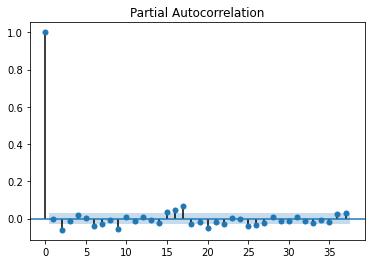

In [36]:
#PACF
plt.figure(figsize=(12,6))
plot_pacf(ts_df['log_difference'])
plt.show()

In [37]:
VAR_ts_df = pd.concat([ts_df['log_difference'],comp], axis=1)

In [38]:
model = VAR(VAR_ts_df)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [39]:
model_fit = model.fit(maxlags=13)

In [40]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 17, Nov, 2021
Time:                     02:33:18
--------------------------------------------------------------------
No. of Equations:         41.0000    BIC:                    165.912
Nobs:                     4714.00    HQIC:                   146.461
Log likelihood:          -572706.    FPE:                1.11018e+59
AIC:                      135.917    Det(Omega_mle):     1.36338e+57
--------------------------------------------------------------------
Results for equation log_difference
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.000096         0.000071            1.353           0.176
L1.log_difference         -0.008138         0.015527           -0.524           0.600
L1.0                      -0.00

##VAR Forecasting Results With Components

In [41]:
lag = model_fit.k_ar
lag

13

In [45]:
forecast_res = model_fit.forecast(components.values[-lag:], 10)

AttributeError: ignored

#Implementing VAR(2) Rolling

In [16]:
var_results = []

In [17]:
for column in ts_df:
  if(column=='log_difference'):
    pass
  else:
    print(column)

swiss franc
Europe
EUR
Switzerland
CHF
NASDAQ
S&P500
VIX
volatility
Germany
UK
sterling pound
GBP
Greece
Italy
Spain
France
DAX
unemployment
recession
euro
crisis
fed
finance
financial crisis
federal reserve
gold
inflation
treasuries
OPEC
contagion
corruption
disaster
futures
forwards
president
parliament
aid
EU
European Union
stimulus
capital gains
climate change
OECD
conflict
environment
ECB
SNB
bank
IMF
USD
US Dollar
China
US
MSCI
home
dividend
labor
buy
financial market
short selling
earnings
profit
derivative
buy and hold
oil
politics
invest
crash
nyse
water
consume
trader
housing
gain
investment
revenue
mortgage
house
dow jones
portfolio
travel
consumption
loss
credit
default
hedge
headlines
leverage
chance
money
society
war
transaction
cash
economy
stocks
forex
growth
culture
banking
markets
office
stock market
bonds
risk
sell
metals
economics
debt
war.1
pandemic
disease
meltdown
steel
silver
bronze
corn
commodities
natural gas
agriculture
emerging market
trade
interest rate
GDP

In [18]:
for column in ts_df:

  if(column=='log_difference'):
    pass
  else:
    subset_ts_df = ts_df[['log_difference', column]]
    model = VAR(subset_ts_df)
    model_fit = model.fit(maxlags=10)
    var_results.append(model_fit.pvalues['log_difference'].round(3))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was pro

In [19]:
len(var_results)

154

In [20]:
var_results[0]

const                 0.185
L1.log_difference     0.678
L1.swiss franc        0.540
L2.log_difference     0.000
L2.swiss franc        0.597
L3.log_difference     0.312
L3.swiss franc        0.363
L4.log_difference     0.351
L4.swiss franc        0.424
L5.log_difference     0.865
L5.swiss franc        0.613
L6.log_difference     0.024
L6.swiss franc        0.233
L7.log_difference     0.057
L7.swiss franc        0.165
L8.log_difference     0.683
L8.swiss franc        0.881
L9.log_difference     0.000
L9.swiss franc        0.964
L10.log_difference    0.685
L10.swiss franc       0.960
Name: log_difference, dtype: float64

In [21]:
var_results[0][2]

0.54

In [22]:
Ps = []

In [23]:
for i in range(0, 154, 1):

  for j in range(2, 22, 2):
    Ps.append(var_results[i][j])

In [24]:
Ps[0:10]

[0.54, 0.597, 0.363, 0.424, 0.613, 0.233, 0.165, 0.881, 0.964, 0.96]

In [25]:
len(Ps)/154

10.0

In [26]:
chunks = [Ps[x:x+10] for x in range(0, len(Ps), 10)]

In [27]:
chunks

[[0.54, 0.597, 0.363, 0.424, 0.613, 0.233, 0.165, 0.881, 0.964, 0.96],
 [0.961, 0.825, 0.665, 0.351, 0.095, 0.57, 0.148, 0.604, 0.474, 0.912],
 [0.817, 0.364, 0.843, 0.995, 0.828, 0.864, 0.982, 0.066, 0.402, 0.04],
 [0.982, 0.32, 0.383, 0.768, 0.771, 0.919, 0.551, 0.551, 0.868, 0.989],
 [0.589, 0.105, 0.097, 0.674, 0.784, 0.212, 0.054, 0.607, 0.072, 0.082],
 [0.756, 0.682, 0.714, 0.813, 0.317, 0.772, 0.563, 0.898, 0.615, 0.566],
 [0.755, 0.828, 0.996, 0.592, 0.67, 0.897, 0.472, 0.984, 0.667, 0.555],
 [0.532, 0.218, 0.786, 0.701, 0.156, 0.797, 0.527, 0.276, 0.791, 0.183],
 [0.872, 0.911, 0.862, 0.673, 0.675, 0.678, 0.598, 0.329, 0.816, 0.39],
 [0.469, 0.624, 0.885, 0.354, 0.743, 0.936, 0.977, 0.761, 0.866, 0.849],
 [0.827, 0.762, 0.522, 0.88, 0.755, 0.981, 0.547, 0.705, 0.914, 0.475],
 [0.859, 0.965, 0.341, 0.833, 0.935, 0.955, 0.97, 0.655, 0.936, 0.551],
 [0.844, 0.172, 0.829, 0.567, 0.41, 0.383, 0.66, 0.375, 0.371, 0.271],
 [0.988, 0.187, 0.699, 0.969, 0.796, 0.968, 0.993, 0.811, 0.18

In [28]:
len(chunks)

154

In [29]:
p = pd.DataFrame()

In [30]:
for i in range(0, len(chunks), 1):
  q = pd.DataFrame(chunks[i])
  p = pd.concat([p, q], axis=1)

In [31]:
trend_names = ts_df.columns

In [32]:
p.columns = trend_names[1:]
p.index = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Lag6', 'Lag7', 'Lag8', 'Lag9', 'Lag10']

In [33]:
for column in p:
  
   print(p[column] < 0.05)

Lag1     False
Lag2     False
Lag3     False
Lag4     False
Lag5     False
Lag6     False
Lag7     False
Lag8     False
Lag9     False
Lag10    False
Name: swiss franc, dtype: bool
Lag1     False
Lag2     False
Lag3     False
Lag4     False
Lag5     False
Lag6     False
Lag7     False
Lag8     False
Lag9     False
Lag10    False
Name: Europe, dtype: bool
Lag1     False
Lag2     False
Lag3     False
Lag4     False
Lag5     False
Lag6     False
Lag7     False
Lag8     False
Lag9     False
Lag10     True
Name: EUR, dtype: bool
Lag1     False
Lag2     False
Lag3     False
Lag4     False
Lag5     False
Lag6     False
Lag7     False
Lag8     False
Lag9     False
Lag10    False
Name: Switzerland, dtype: bool
Lag1     False
Lag2     False
Lag3     False
Lag4     False
Lag5     False
Lag6     False
Lag7     False
Lag8     False
Lag9     False
Lag10    False
Name: CHF, dtype: bool
Lag1     False
Lag2     False
Lag3     False
Lag4     False
Lag5     False
Lag6     False
Lag7     False
Lag8     Fa

In [34]:
p = p.T

In [35]:
p

,Lag1,Lag2,Lag3,Lag4,Lag5,Lag6,Lag7,Lag8,Lag9,Lag10
swiss franc,0.540,0.597,0.363,0.424,0.613,0.233,0.165,0.881,0.964,0.960
Europe,0.961,0.825,0.665,0.351,0.095,0.570,0.148,0.604,0.474,0.912
EUR,0.817,0.364,0.843,0.995,0.828,0.864,0.982,0.066,0.402,0.040
Switzerland,0.982,0.320,0.383,0.768,0.771,0.919,0.551,0.551,0.868,0.989
CHF,0.589,0.105,0.097,0.674,0.784,0.212,0.054,0.607,0.072,0.082
...,...,...,...,...,...,...,...,...,...,...
LIBOR,0.821,0.808,0.744,0.609,0.669,0.784,0.337,0.560,0.775,0.859
2008,0.903,0.611,0.707,0.525,0.082,0.057,0.504,0.947,0.279,0.196
bubble,0.704,0.705,0.763,0.434,0.929,0.859,0.677,0.759,0.701,0.497
energy,0.352,0.972,0.899,0.848,0.456,0.395,0.514,0.183,0.280,0.513


In [36]:
with open('VAR(2) CHFEUR.tex', 'w') as tf:
     tf.write(p.to_latex())

#Benchmark VAR

#VAR with most significant Trends

#VAR with components?